In [1]:
# renv::install("sicegar")
# library(sicegar)
library(dplyr)
library(tidyr)
library(readr)
library(purrr)
library(here)
library(lubridate)
library(ggplot2)
library(scales)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


here() starts at /users/sadamov/RProjects/CHAPo


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




Data Import and Preparation

In [45]:
pollen_daily <- read_delim(paste0(here(), "/data/dwh/pollen_dwh_daily.txt"), delim = " ", skip = 17, trim_ws = TRUE)
pollen_daily %<>% 
    mutate(across(is.numeric, ~ if_else(. < 0, NA_real_, .)),
    # datetime = ymd_hm(paste0(YYYY, "-", sprintf("%02d", MM), "-", sprintf("%02d", DD), " ", sprintf("%02d", HH), ":", sprintf("%02d", mm))),
    monthday = paste0(sprintf("%02d", MM), sprintf("%02d", DD))) %>%
    select(-(YYYY:mm)) %>%
    setNames(tolower(names(.))) %>%
    pivot_longer(plo:pcf, names_to = "station", values_to = "conc") %>%
    group_by(parameter, station, monthday) %>%
    summarise(conc = mean(conc, na.rm = TRUE)) %>%
    ungroup() %>%
    filter(monthday != "0229") %>%
    mutate(datetime = ymd(paste0("2001", monthday))) %>%
    split(.$parameter)
pollen_daily





── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  PARAMETER = col_character()
)
ℹ Use `spec()` for the full column specifications.


`summarise()` has grouped output by 'parameter', 'station'. You can override using the `.groups` argument.



parameter,station,monthday,conc,datetime
<chr>,<chr>,<chr>,<dbl>,<date>
ALNU24,pbe,0101,0.0000000,2001-01-01
ALNU24,pbe,0102,0.0000000,2001-01-02
ALNU24,pbe,0103,0.0000000,2001-01-03
ALNU24,pbe,0104,0.7272727,2001-01-04
ALNU24,pbe,0105,1.3076923,2001-01-05
ALNU24,pbe,0106,0.1428571,2001-01-06
ALNU24,pbe,0107,0.2500000,2001-01-07
ALNU24,pbe,0108,0.2500000,2001-01-08
ALNU24,pbe,0109,0.5000000,2001-01-09


In [46]:
pollen_daily_sum <- map(pollen_daily, ~.x %>%
    group_by(parameter, monthday) %>%
    summarise(conc = sum(conc, na.rm = TRUE)) %>%
    ungroup() %>%
    mutate(time = 1:365,
    intensity = rescale(conc)) %>%
    select(time, intensity))
pollen_daily_sum

`summarise()` has grouped output by 'parameter'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'parameter'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'parameter'. You can override using the `.groups` argument.



time,intensity
<int>,<dbl>
1,0.02499745
2,0.03461279
3,0.04568260
4,0.01660810
5,0.04366685
6,0.04074402
7,0.06496650
8,0.05149873
9,0.05889773


Timeseries Plots

Warning message:
“Removed 1172 rows containing missing values (position_stack).”
Warning message:
“Removed 1172 rows containing missing values (position_stack).”


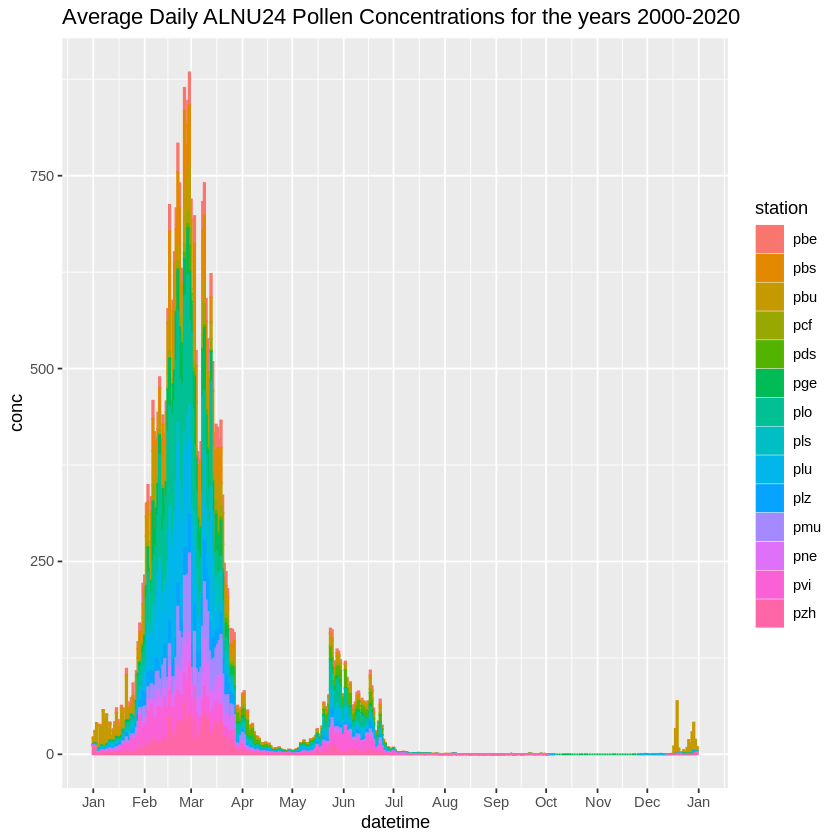

Warning message:
“Removed 1172 rows containing missing values (position_stack).”


$ALNU24

$BETU24

$POAC24


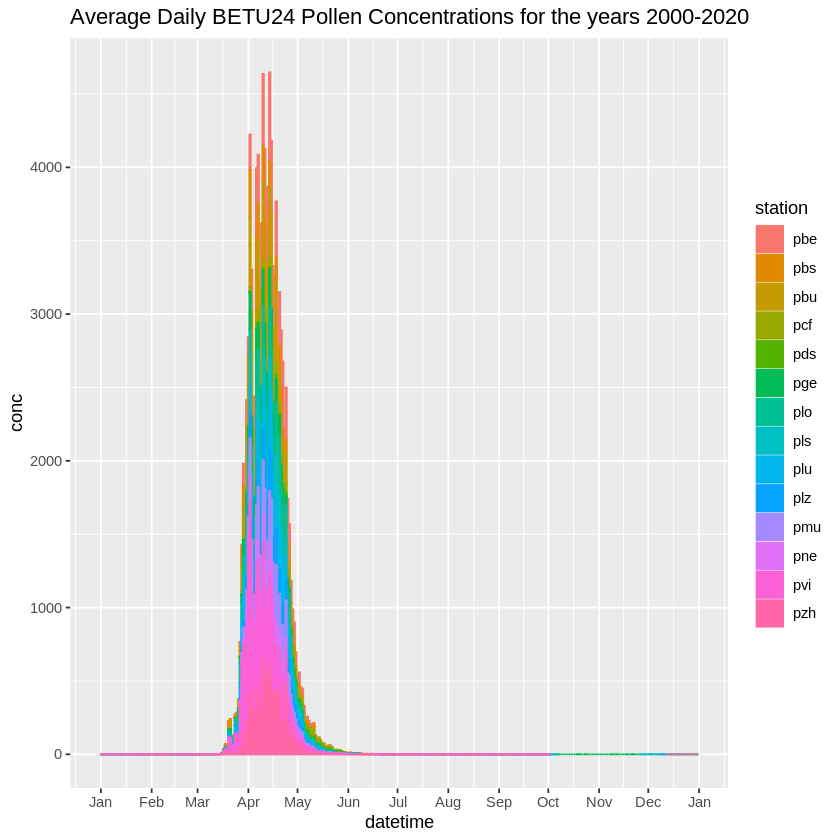

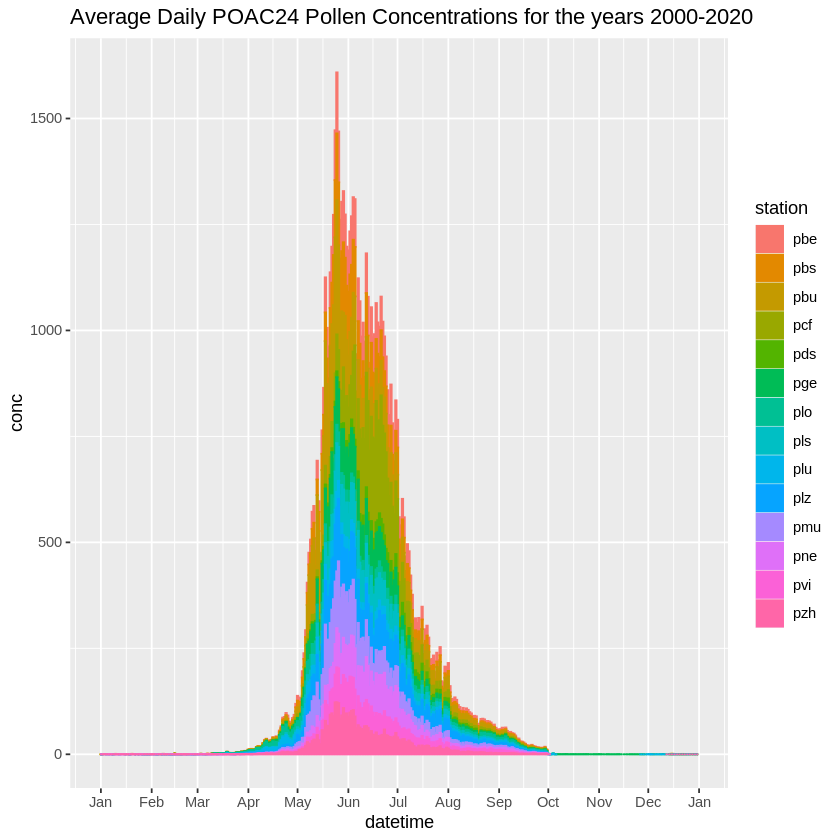

In [47]:
map(pollen_daily, ~
    ggplot(.x, aes(x = datetime, y = conc, col = station, fill = station)) +
    geom_col() +
    ggtitle(paste("Average Daily", unique(.x$parameter), "Pollen Concentrations for the years 2000-2020")) +
    scale_x_date(date_labels = "%b", date_breaks = "1 month"))

In [15]:
pollen_daily

parameter,station,monthday,conc
<chr>,<chr>,<chr>,<dbl>
ALNU24,pbe,0101,0.0000000
ALNU24,pbe,0102,0.0000000
ALNU24,pbe,0103,0.0000000
ALNU24,pbe,0104,0.7272727
ALNU24,pbe,0105,1.3076923
ALNU24,pbe,0106,0.1428571
ALNU24,pbe,0107,0.2500000
ALNU24,pbe,0108,0.2500000
ALNU24,pbe,0109,0.5000000


In [ ]:
normalizedInput <- normalizeData(dataInput = pollen_daily_sum[[3]], 
                                                dataInputName = "doubleSigmoidalSample")
# Fit double-sigmoidal model
doubleSigmoidalModel <- multipleFitFunction(dataInput = normalizedInput,
                                                model = "doublesigmoidal",
                                                n_runs_min = 20,
                                                n_runs_max = 500,
                                                showDetails = FALSE)                                                
# Calculate additional parameters
doubleSigmoidalModel <- parameterCalculation(doubleSigmoidalModel)

# Plotting the model
figureModelCurves(dataInput = normalizedInput,
doubleSigmoidalFitVector = doubleSigmoidalModel,
showParameterRelatedLines = TRUE)

In [ ]:
parameterCalculation(doubleSigmoidalModel)